# Statistical analysis on NHANES data collected between 1999 and 2006

Before starting the process, let's have a look to the **software environment** :

In [1]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04 LTS

Matrix products: default
BLAS: /opt/conda/lib/R/lib/libRblas.so
LAPACK: /opt/conda/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.4.1  magrittr_1.5    IRdisplay_0.4.4 pbdZMQ_0.3-2   
 [5] tools_3.4.1     htmltools_0.3.6 base64enc_0.1-3 crayon_1.3.4   
 [9] Rcpp_0.12.18    uuid_0.1-2      stringi_1.2.4   IRkernel_0.8.12
[13] jsonlite_1.5    stringr_1.3.1   digest_0.6.16   repr_0.15.0    
[17] evalu

We can see that the `R version` in the Jupyter notebook is `3.4.1` and the OS is `Ubuntu 18.04 LTS`. The `Jupyter notebook version` not displayed in the output is `5.6.0`. These elements might be important if a user tries to re-create the exact software-environment. Also for each library that will be loaded, the versions will be specified for the same reason.

# The present notebook is divided in six parts :
### 1. Connect to the MRAN repository and load the packages 
### 2. Dataset provenance
### 3. Load the data from the local `nhanes_extracted` file
### 4. Data management
### 5. Descriptive statistics
### 6. Hypothesis testing 

Assuming you are currently using either Jupyter or mybinder and want to reproduce the workflow, you need to erase all the cells outputs and then execute the code again. In order to so, click on Kernel > Restart & clear output. Then you can execute the code by selecting a cell and clicking on the run button (or by using the appropriate shortcut mentioned in the Help section). You can interact with the code and edit it all along the notebook.

_More information on how to use Jupyter at http://jupyter.org/documentation_

# 1) Connect to the M.R.A.N repository and load the packages 

C.R.A.N (Comprehensive R Archive Network) is a package repository of the programming language R. Packages tend to get many updates over time and M.R.A.N (Microsoft R Application Network) enables to retrieve packages with 'frozen' versions corresponding to a specific date (in our illustration the date is set to 2018-09-14). MRAN basically consists of daily snapshots of CRAN. Extracting versions of different packages set on a specific date facilitates consistency between packages and therefore reproducibility. More information on : https://cran.r-project.org/ and https://mran.microsoft.com/ .

The line of code below sets the repository to MRAN instead of the default CRAN. (_When executing the notebook on mybinder it is facultative to run the next cell since the `runtime.txt` file in the Github repository already specifies it_)

In [2]:
options(repos = c(CRAN = "https://mran.revolutionanalytics.com/snapshot/2018-09-14"))

We can check with the line of code below that the repository used to install packages is correctly set to MRAN. You should get a URL that contains 'mran' and the date mentioned above.

In [3]:
getOption("repos")

CRAN 
"https://mran.revolutionanalytics.com/snapshot/2018-09-14"

If running the notebook in Mybinder,there is no need to execute the `install.packages()` function since the installation of every packages is already done by the `install.R` file from the Github repository (except the `Rcupcake` package which is requiring the `install_github()`function). However, we did mention the line of code necessary for the installation of packages after the `#` symbol in case of using a local Jupyter notebook.

### dplyr package 

In [4]:
#install.packages("dplyr")
library(dplyr)
packageVersion("dplyr")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] ‘0.7.6’

### prettyR package 

In [5]:
#install.packages("prettyR")
library(prettyR)
packageVersion("prettyR")

[1] ‘2.2’

# 2) Dataset provenance

The `NHANES_extracted.csv` which is published in the same repository, is NHANES data collected between 1999 and 2006 with only the seven variables of interest for this work (female, male, age, BMI, waist circumference and sugar-free diet). It was extracted from the NHANES dataset (`MainTable.csv file`) archived in dryad digital repository at http://dx.doi.org/10.5061/dryad.d5h62. This large dataset containing data collected between 1999 and 2006, was reassembled by the PIC-SURE team from CDC NHANES files (https://www.cdc.gov/nchs/nhanes/index.htm) to form what is called the 'NHANES unified dataset'.

This second section describes how we extracted the dataset (`NHANES_extracted.csv`) which we will be working on. 

**The extraction process itself is voluntary displayed in 'markdown cell' meaning that it is not executable because we do not provide the whole dataset in the Github repository. However you are free to reproduce the whole steps after downloading the starting point dataset if needed.**

_For more information on NHANES unified dataset, see the article 'A database of human exposomes and phenomes from the US National Health and Nutrition Examination Survey' on https://www.nature.com/articles/sdata201696_

### a) Load the whole dataset in the object `nhanes_dataset`

nhanes_dataset <- read.table("MainTable.csv", sep=",", header = TRUE)

### b) Create a smaller dataset with only the variables of interest : `nhanes_extracted`

nhanes_extracted <- nhanes_dataset %>% select('SEQN', 'female', 'male', 'RIDAGEYR', 'BMXBMI', 'BMXWAIST', 'DRDSDT4')

### c) Save the dataset in `NHANES_extracted.csv` file

write.csv(nhanes_extracted, file = "NHANES_extracted.csv")

# 3) Load the data from the local `nhanes_extracted` file

Make sure the `nhanes_extracted.csv` file is in the directory you are working in, and execute the following line of code :

In [6]:
nhanes_extracted <- read.csv("NHANES_extracted.csv")

Here's a view of the six first rows of `nhanes_extracted` :

In [7]:
head(nhanes_extracted)

X,SEQN,female,male,RIDAGEYR,BMXBMI,BMXWAIST,DRDSDT4
1,1,1,0,2,14.90,45.7,NA
2,2,0,1,77,24.90,98.0,NA
3,3,1,0,10,17.63,64.7,NA
4,4,0,1,1,NA,NA,NA
5,5,0,1,49,29.10,99.9,NA
6,6,1,0,19,22.56,81.6,NA


`X` and `SEQN` being redundant, we can delete the `X` column :

In [8]:
nhanes_extracted <- nhanes_extracted[-1]

# 4) Data management

### a) Basic quick overview of variables structure

In [9]:
glimpse(nhanes_extracted)

Observations: 41,474
Variables: 7
$ SEQN     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...
$ female   <int> 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1...
$ male     <int> 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0...
$ RIDAGEYR <int> 2, 77, 10, 1, 49, 19, 59, 13, 11, 43, 15, 37, 70, 81, 38, ...
$ BMXBMI   <dbl> 14.90, 24.90, 17.63, NA, 29.10, 22.56, 29.39, 15.51, 18.48...
$ BMXWAIST <dbl> 45.7, 98.0, 64.7, NA, 99.9, 81.6, 90.7, 64.1, 64.6, 108.0,...
$ DRDSDT4  <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...


We can notice that there are two variables for the sex variable (`female` and `male`) and some variables names are not intuitive. Also the variable adressing the sugar-fee diet `DRDSDT4` (yes or no) is considered as integer instead of categorical. We will then modify these in the next steps.

### b) Modify variables names to make it more understandable

_Variables correspondence are findable in the dryad digital repository mentioned in section 2 and in cdc.gov website (https://www.cdc.gov/nchs/nhanes/index.htm)._

In [10]:
variables <- c('index', 'female', 'male', 'age', 'body_mass_index', 'waist_circumference', 'sugarfree_diet' )

names(nhanes_extracted) <- variables

head(nhanes_extracted)

index,female,male,age,body_mass_index,waist_circumference,sugarfree_diet
1,1,0,2,14.90,45.7,NA
2,0,1,77,24.90,98.0,NA
3,1,0,10,17.63,64.7,NA
4,0,1,1,NA,NA,NA
5,0,1,49,29.10,99.9,NA
6,1,0,19,22.56,81.6,NA


### c) Transform the variable `sugarfree_diet` into a categorical variable and label it

In [11]:
nhanes_extracted$sugarfree_diet <- factor(nhanes_extracted$sugarfree_diet, levels=c('0','1'), labels=c('No','Yes'))

###  d)  Create one categorical variable `sex`

First let's check that `female` and `male` are mutually exclusive as expected:

In [12]:
table(nhanes_extracted$female, nhanes_extracted$male, deparse.level = 2, useNA = 'always')

                       nhanes_extracted$male
nhanes_extracted$female     0     1  <NA>
                   0        0 20264     0
                   1    21210     0     0
                   <NA>     0     0     0

Now let's creat a single categorical variable `sex` :

In [13]:
nhanes_extracted <- nhanes_extracted %>% mutate(sex = ifelse(female == 1, "female", "male")) %>% select(-c('female', 'male'))

In [14]:
nhanes_extracted$sex <- as.factor(nhanes_extracted$sex)

# 5) Descriptive statistics

Here's a view of the six first rows of `nhanes_extracted` now that we have modified the variables:

In [15]:
head(nhanes_extracted)

index,age,body_mass_index,waist_circumference,sugarfree_diet,sex
1,2,14.90,45.7,NA,female
2,77,24.90,98.0,NA,male
3,10,17.63,64.7,NA,female
4,1,NA,NA,NA,male
5,49,29.10,99.9,NA,male
6,19,22.56,81.6,NA,female


## a) Description of variables

The following meaning of the variables are provided according to the CDC NHANES website (https://www.cdc.gov/nchs/nhanes/index.htm):

- `index` : index number of patients
- `sex` : female or male
- `age` : age of individuals in years
- `body_mass_index` : Body mass index of individual in kg/m^2
- `waist_circumference` : waist circumference of indviduals in cm
- `sugarfree_diet` : yes (the individual has a sugar-free diet) / no (the individual does not have a sugar free diet)

Below you can see a basic statistics summary of our dataset :

In [16]:
describe(nhanes_extracted[, -1], num.desc = c("mean", "sd", "median", "min", "max", "valid.n"))

Description of nhanes_extracted[, -1] 



 Numeric 
                     mean    sd median   min    max valid.n
age                 29.25 24.80   19.0  0.00  85.00   41474
body_mass_index     24.94  7.19   24.2  7.99 130.21   35108
waist_circumference 85.04 21.01   85.3 32.00 175.00   34409

 Factor 
              
sugarfree_diet     <NA>       No    Yes
       Count   21881.00 19482.00 111.00
       Percent    52.76    46.97   0.27
Mode NA 
         
sex         female     male
  Count   21210.00 20264.00
  Percent    51.14    48.86
Mode female 

## b) Gender distribution

In [17]:
gender_distribution <- table(nhanes_extracted$sex)

gender_distribution


female   male 
 21210  20264 

In [18]:
gender_proportion<- round(100*gender_distribution/sum(gender_distribution), 1)

gender_proportion


female   male 
  51.1   48.9 

There are 21210 females (51.1%) and 20264 males (48.9%) in this sample.

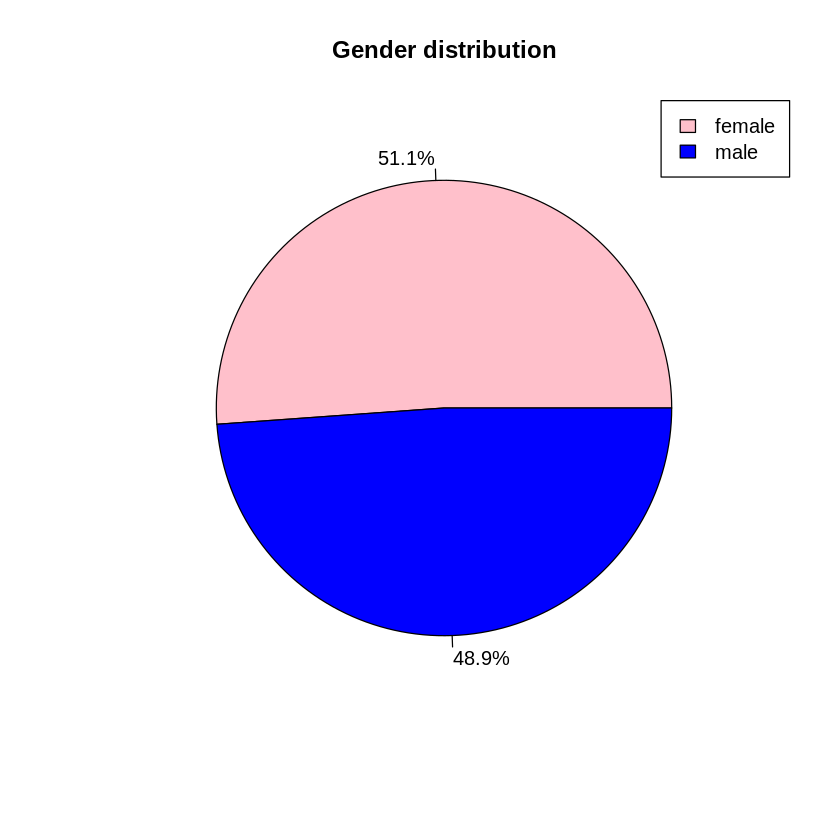

In [19]:
gender_percent <- paste(gender_proportion,"%",sep="")

pie(gender_distribution, labels = gender_percent, main = "Gender distribution", col = c("pink", "blue"))
legend("topright", c("female", "male"), fill = c("pink", "blue"))

## c) Age according to gender distribution

sex,first_quantile_age,median_age,third_quantile_age
female,10,20,47.00
male,9,19,47.25


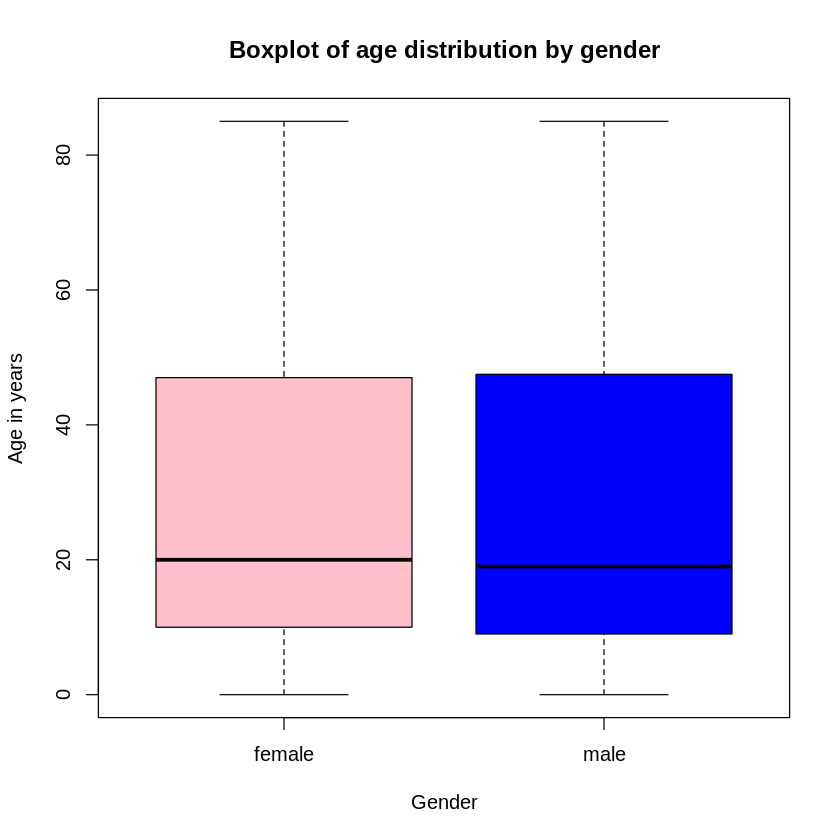

In [20]:
nhanes_extracted %>% group_by(sex)%>% summarise(first_quantile_age = quantile(age, probs = 0.25, na.rm = TRUE), median_age = median(age, na.rm = TRUE), third_quantile_age = quantile(age, probs = 0.75, na.rm = TRUE))

boxplot(age~sex, data = nhanes_extracted, main = "Boxplot of age distribution by gender", xlab = "Gender", ylab = "Age in years", col = c("pink", "blue"))

The output above shows similar distributions of age in males and females in this sample.

## d) Body mass index (BMI) according to gender

sex,first_quantile_bmi,median_bmi,third_quantile_bmi
female,19.64,24.22,29.73
male,19.30,24.17,28.60


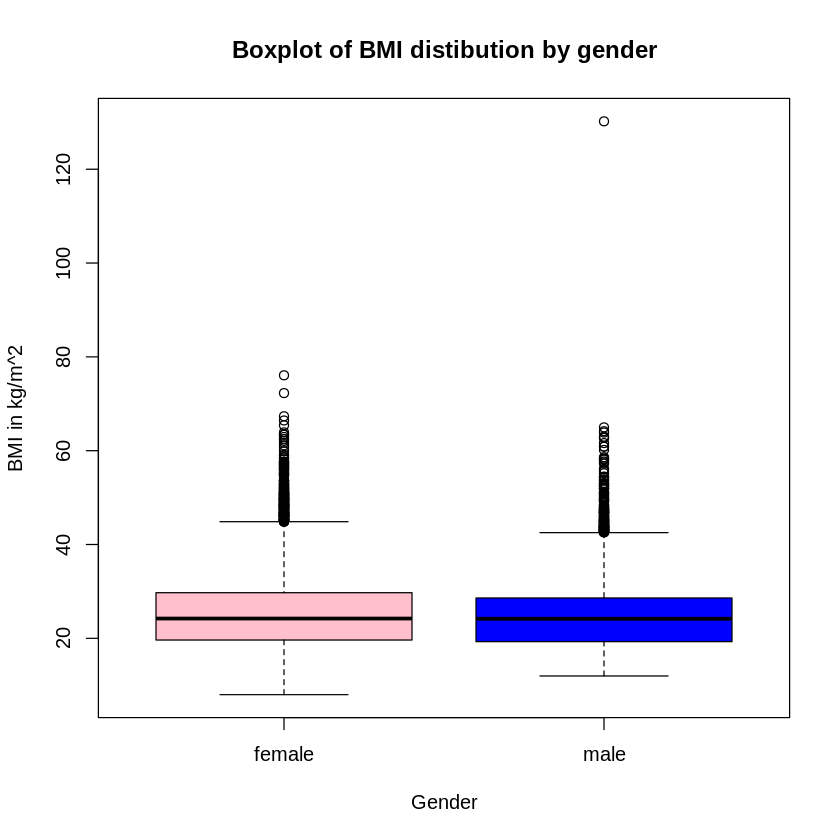

In [21]:
nhanes_extracted %>% group_by(sex)%>% summarise(first_quantile_bmi = quantile(body_mass_index, probs = 0.25, na.rm = TRUE), median_bmi = median(body_mass_index, na.rm = TRUE), third_quantile_bmi = quantile(body_mass_index, probs = 0.75, na.rm = TRUE))

boxplot(body_mass_index~sex, data = nhanes_extracted, main = "Boxplot of BMI distibution by gender", xlab = "Gender", ylab = "BMI in kg/m^2", col = c("pink", "blue"))

BMI distribution of females is slightly more widespread than males distribution.

# 6) Hypothesis testing 

We are here exploring if there is a relationship between having a sugarfree diet and the waist circumference in this NHANES sample. In this study, measurements are performed on individuals over 2 years old.

For better clarity, let's subset a new dataset comprising only those individuals.

In [22]:
nhanes_over_two <- nhanes_extracted  %>% filter(age >=2)

In [23]:
#quick check of the number of observations and variables
dim(nhanes_over_two)

[1] 38124     6

We have now generated our new dataset with 38 124 individuals (over 2 years old) and the same 6 variables from the previous dataset.
You can see below a basic statistics summary :

In [24]:
describe(nhanes_over_two[, -1], num.desc = c("mean", "sd", "median", "min", "max", "valid.n"))

Description of nhanes_over_two[, -1] 



 Numeric 
                     mean    sd median   min    max valid.n
age                 31.79 24.28   23.0  2.00  85.00   38124
body_mass_index     24.94  7.19   24.2  7.99 130.21   35108
waist_circumference 85.05 21.01   85.3 32.00 175.00   34408

 Factor 
              
sugarfree_diet     <NA>       No    Yes
       Count   20183.00 17831.00 110.00
       Percent    52.94    46.77   0.29
Mode NA 
         
sex         female     male
  Count   19636.00 18488.00
  Percent    51.51    48.49
Mode female 

We can see that there are missing values in every variables except from `age` and `sex`.

**Missing values in `sugarfree_diet` and `waist_circumference` represent more than 50% and about 10% of the observations respectively.**

### a) What are the means of waist circumference in both groups ?

In [25]:
nhanes_over_two %>% group_by(sugarfree_diet)%>% summarise(count = n(), mean = mean(waist_circumference, na.rm = TRUE))

sugarfree_diet,count,mean
No,17831,85.42428
Yes,110,100.86698
NA,20183,84.57783


**3716** observations with missing values in `waist_circumference` were exluded (`na.rm = TRUE`) in order to compute means (_run the code below to get this number_).

In [26]:
nhanes_over_two %>% filter(is.na(nhanes_over_two$waist_circumference))%>% nrow()

[1] 3716

For the purpose of this work, we will assume that all the missing data are **MCAR** (missing completely at random), therefore we will not impute any missing data.

### b) Test the hypothesis ( wilcoxon test )

Let's test the association between having a sugar-free diet and the waist circumference with the Wilcoxon test :

In [27]:
wilcox.test(waist_circumference~sugarfree_diet, conf.int=TRUE, data = nhanes_over_two)


	Wilcoxon rank sum test with continuity correction

data:  waist_circumference by sugarfree_diet
W = 532500, p-value = 4.247e-13
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -19.60005 -11.40002
sample estimates:
difference in location 
             -15.50001 


The output above shows a statistically significant association between having a sugarfree diet and the waist circumference in our sample (IC95 = [11,4; 19.6]; p< 0.001).
We can not draw any causality statement from this analysis since the design of the study (observational study) does not allow it.

**This notebook is only intended as an illustration of a basic statistical analysis in our attempt to create a reproducible and F.A.I.R (findable, accessible, interoperable and reusable) statistical analysis.**